# Fertilizer Prediction Model

## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

## Dataset Loading

In [28]:
fertilizer = pd.read_csv('Dataset/fertilizer Prediction.csv')

In [29]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


## Encoding the Categorical Values

In [30]:
encoder = LabelEncoder()

columns = ['Soil Type', 'Crop Type']
fertilizer[columns] = fertilizer[columns].apply(encoder.fit_transform)

In [31]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea


In [32]:
fertilizer['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

## Encoding target column

In [ ]:
fert_dict = {
    'Urea' : 0,
    'DAP' : 1,
    '28-28' : 2,
    '14-35-14' : 3,
    '20-20' : 4,
    '17-17-17' : 5,
    '10-26-26' : 6,
}

In [34]:
fertilizer['fert_no'] = fertilizer['Fertilizer Name'].map(fert_dict)

In [35]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,fert_no
0,26,52,38,4,3,37,0,0,Urea,0
1,29,52,45,2,8,12,0,36,DAP,1
2,34,65,62,0,1,7,9,30,14-35-14,3
3,32,62,34,3,9,22,0,20,28-28,2
4,28,54,46,1,6,35,0,0,Urea,0


In [36]:
fertilizer['fert_no'].value_counts()

fert_no
0    22
1    18
2    17
3    14
4    14
5     7
6     7
Name: count, dtype: int64

In [37]:
fertilizer.drop('Fertilizer Name', axis=1, inplace=True)

In [38]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,4,3,37,0,0,0
1,29,52,45,2,8,12,0,36,1
2,34,65,62,0,1,7,9,30,3
3,32,62,34,3,9,22,0,20,2
4,28,54,46,1,6,35,0,0,0


## Splitting Dataset into features and target

In [39]:
x = fertilizer.drop('fert_no', axis=1)
y = fertilizer['fert_no']

x.shape, y.shape

((99, 8), (99,))

## Splitting Data into train and test

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((79, 8), (20, 8), (79,), (20,))

## Scaling the featues

In [42]:
# scaling the features using standard scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Model Selection

In [43]:
models = {
    'LogisticRegression': LogisticRegression(solver='liblinear'),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(probability=True),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'CatBoostClassifier': CatBoostClassifier(verbose=0),
    'LGBMClassifier': LGBMClassifier(verbose=-1) 
}

In [45]:
# Iterate through the models, fit, predict, and evaluate
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    score = accuracy_score(y_test, y_pred)
    print(f"\n{name} model with accuracy: {score:.4f}")


LogisticRegression model with accuracy: 0.8000

GaussianNB model with accuracy: 1.0000

SVC model with accuracy: 0.8000

KNeighborsClassifier model with accuracy: 0.6000

DecisionTreeClassifier model with accuracy: 1.0000

ExtraTreeClassifier model with accuracy: 0.7500

RandomForestClassifier model with accuracy: 0.9500

BaggingClassifier model with accuracy: 1.0000

GradientBoostingClassifier model with accuracy: 0.9500

AdaBoostClassifier model with accuracy: 0.7000

CatBoostClassifier model with accuracy: 1.0000

LGBMClassifier model with accuracy: 0.9500


As we can see several models giving 100% accuracy, so lets take any model and perform evaluation and prediction

 - CatBoostClassifier model with accuracy: 1.0000
 - BaggingClassifier model with accuracy: 1.0000
 - DecisionTreeClassifier model with accuracy: 1.0000
 - GaussianNB model with accuracy: 1.0000

## Model Evaluation

In [46]:
model = DecisionTreeClassifier()

model.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [47]:
# evaluate the model on training data
y_pred = model.predict(x_train_scaled)
score = accuracy_score(y_train, y_pred)
print(f"\nDecisionTreeClassifier model with accuracy: {score:.4f}")


DecisionTreeClassifier model with accuracy: 1.0000


In [48]:
# evaluate the model on testing data
y_pred = model.predict(x_test_scaled)
score = accuracy_score(y_test, y_pred)
print(f"\nDecisionTreeClassifier model with accuracy: {score:.4f}")


DecisionTreeClassifier model with accuracy: 1.0000


In [55]:
# classification report
print("\nClassification Report")
class_report = classification_report(y_test, y_pred)
print(class_report)


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



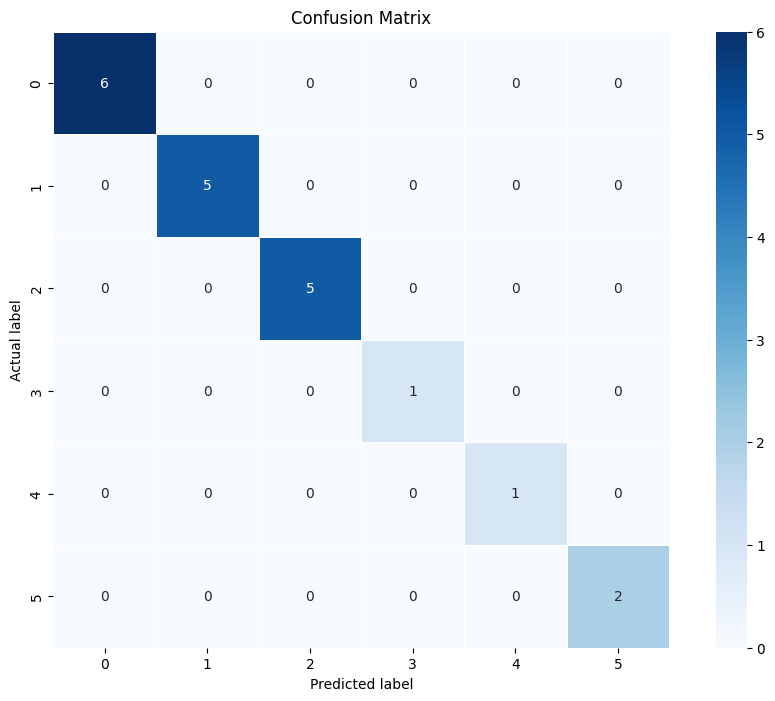

In [53]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square= True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# save the model
joblib.dump(model, 'fertilizer_prediction_model.pkl')

['fertilizer_prediction_model.pkl']